In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [19]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/stringless_train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/stringless_test.csv", index_col="Id")
display(training_data.head(), testing_data.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [20]:
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True)
display(all_data.shape, all_data.head())

(2919, 37)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


# Scores

In [21]:
scores_map = {}

# Random Forest on Training data

In [22]:
training_data = all_data.iloc[:1460, :]
testing_data = all_data.iloc[-1459:, :]
display((training_data.shape, testing_data.shape), training_data.head())

((1460, 37), (1459, 37))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [23]:
X_train, X_test = training_data.iloc[:,:-1], testing_data.iloc[:,:-1]
#X_test
y_train, y_test = training_data.iloc[:,-1:], testing_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
display(X_train.head(), y_train.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [42]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_1660\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [43]:
print("model score on training data:", forest.score(X_train, y_train))
#print("model score on test data:", forest.score(X_test, y_test)) # we do not need this as we do not yet have any prices to compare the random forest model for the missing data
y_predicted = forest.predict(X_train) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9802235280438041


array([206174.8 , 174991.37, 220210.78, ..., 261746.53, 140883.75,
       149790.  ])

In [126]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
y = np.log1p(y_train)
cross_validation = 10

scores_map = {}

In [127]:
forest = RandomForestRegressor()

scores = cross_val_score(forest, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')  #kfold cv=cross_validation
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['RandomForest'] = scores

MSE: -0.02104015262352621 (+/- 0.005555056462922725)


In [128]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=1)

scores = cross_val_score(gbr, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['GradientBoostingRegressor'] = scores

MSE: -0.01788777753937798 (+/- 0.006261930780067034)


In [129]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(desc_tr, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['DecisionTreeRegressor'] = scores

MSE: -0.038642083834822816 (+/- 0.004277286759302694)


In [130]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

scores = cross_val_score(svr_rbf, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['SVR'] = scores

MSE: -0.03071687307318508 (+/- 0.008713164975748637)


In [131]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)

scores = cross_val_score(knn, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['KNeighborsRegressor'] = scores

MSE: -0.03532707320275842 (+/- 0.004905416346074496)


In [132]:
from sklearn.linear_model import LinearRegression

l_regression = LinearRegression()

scores = cross_val_score(l_regression, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['LinearRegression'] = scores

MSE: -0.02541931315572456 (+/- 0.014454045568897995)


In [145]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000)

scores = cross_val_score(xgb, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['XGBRegressor'] = scores

[-0.01845298 -0.01315922 -0.01775841 -0.02801882 -0.02386893 -0.0161584
 -0.02006629 -0.01942832 -0.02267568 -0.02191934]
MSE: -0.020150639707389277 (+/- 0.003989857965839384)


In [ ]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [169]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=1, max_iter=1000)
#print(np.ravel(y))
#clf.fit(x_scaled, np.ravel(y_train))
scores = cross_val_score(clf, x_scaled, np.ravel(y.astype(int)), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['MLPClassifier'] = scores

C:\Users\Alexander\.conda\envs\HousingProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alexander\.conda\envs\HousingProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alexander\.conda\envs\HousingProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alexander\.conda\envs\HousingProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  war

MSE: -0.11232876712328765 (+/- 0.020593556682702612)


C:\Users\Alexander\.conda\envs\HousingProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Alexander\.conda\envs\HousingProject\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

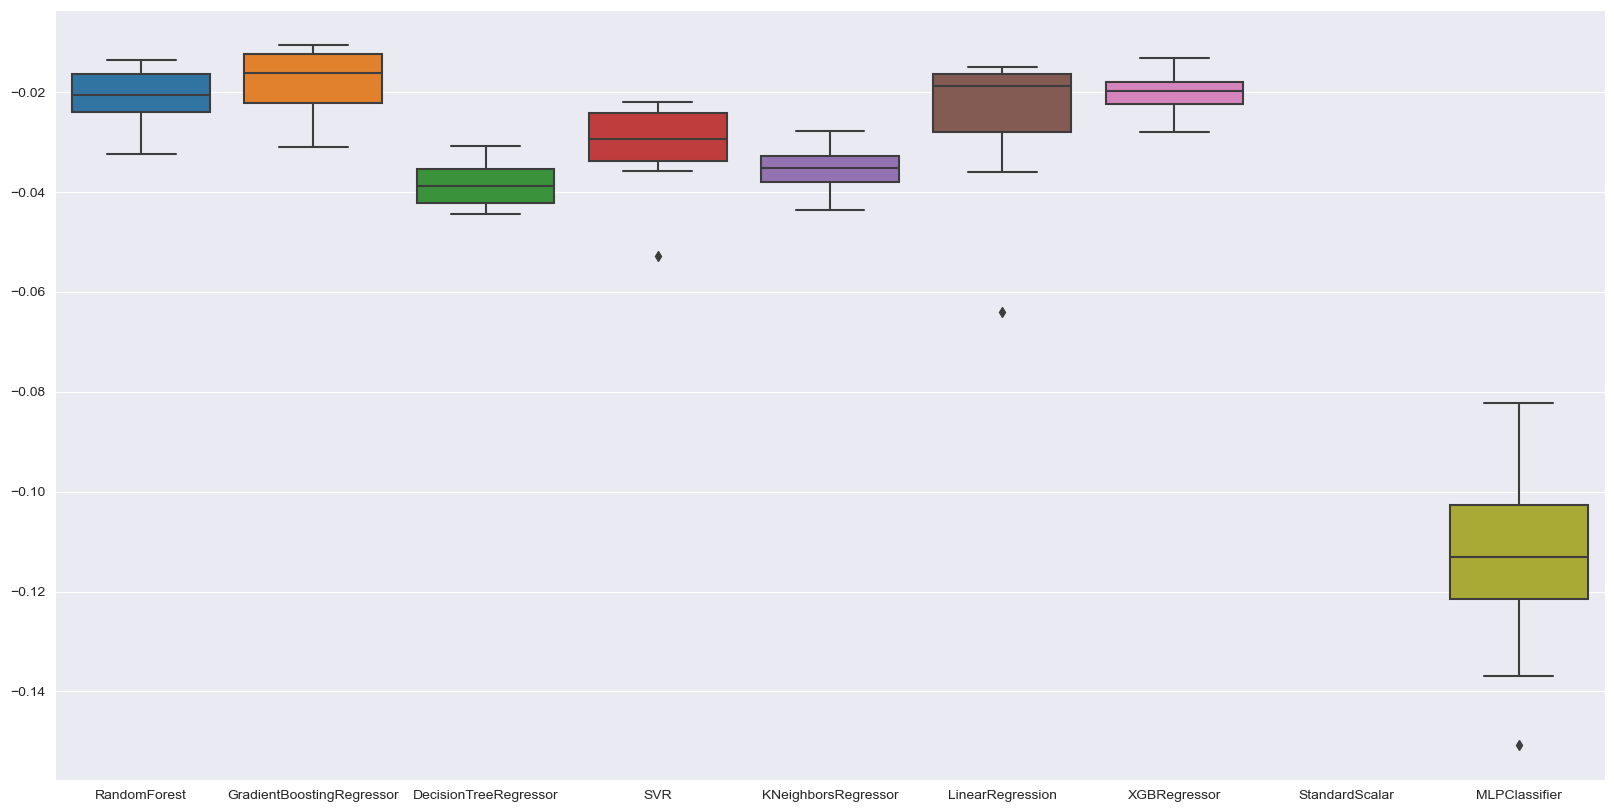

In [170]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)